In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
from rdkit import Chem

from pyvenn import venn

RDKit WARNING: [15:05:14] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
dnp = pd.read_csv('DB/dnpCLASS.txt', sep='\t')
sup = pd.read_csv('DB/supernaturalCLASS.txt', sep='\t')
npatlas  = pd.read_csv('DB/NPAtlas_download.tsv', sep='\t')

In [3]:
jnatprod = pd.read_csv('data/entities_img_dataframe_jnatprod.tsv', sep='\t')  
metabo = pd.read_csv('data/entities_img_dataframe_metabo.tsv', sep='\t')
phytorev = pd.read_csv('data/entities_img_dataframe_phytorev.tsv', sep='\t')  
qn = pd.read_csv('data/entities_img_dataframe_qn.tsv', sep='\t')
chrom_a = pd.read_csv('data/entities_img_dataframe_chroma_a.tsv', sep='\t')
chrom_b = pd.read_csv('data/entities_img_dataframe_chroma_b.tsv', sep='\t')

/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
comp = pd.concat([jnatprod, metabo, phytorev, 
                  qn, chrom_a, chrom_b])
comp.loc[comp['pubchem'].isnull(), 'pubchem'] = 0
comp['pubchem'] = comp['pubchem'].astype(str)
comp.loc[comp['pubchem'].str.contains('csid'), 'pubchem'] = 0
comp['pubchem'] = comp['pubchem'].astype(float)
comp['pubchem'] = comp['pubchem'].astype(int)
comp.loc[comp['pubchem']==0, 'pubchem'] = ''
comp.fillna('', inplace=True)
comp.reset_index(drop=True, inplace=True)
comp.head()

,doi,smiles,standardInChIKey,ExactMolWt,pubchem,standardInChI,source
0,np50051a041,,MBMQEIFVQACCCH-QBODLPLBSA-N,318.146724,5281576,InChI=1S/C18H22O5/c1-12-6-5-9-14(19)8-4-2-3-7-...,oscar
1,np50051a041,,RGSFGYAAUTVSQA-UHFFFAOYSA-N,70.078250,9253,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,oscar
2,np50051a041,,OKTJSMMVPCPJKN-UHFFFAOYSA-N,12.000000,5462310,InChI=1S/C,oscar
3,np50051a041,,BUGBHKTXTAQXES-UHFFFAOYSA-N,79.916521,6326970,InChI=1S/Se,oscar
4,np50051a041,,OKTJSMMVPCPJKN-UHFFFAOYSA-N,12.000000,5462310,InChI=1S/C,oscar


In [5]:
len(comp['standardInChIKey'].unique())

120970

In [27]:
import os
from rdkit import Chem
fls = os.listdir('NuBBE_2473_obabel_3D/')

nubbe = []

for fl in fls:
    if 'smi' in fl:
        f = open(os.path.join('NuBBE_2473_obabel_3D/', fl)).read()
        if f!='':
            nubbe.append(Chem.MolToInchiKey(Chem.MolFromSmiles(f.split()[0]))) 

In [28]:
#nubbe = [x.split('-')[0] for x in nubbe]
len(nubbe)

2222

In [29]:
len(set(nubbe))

2201

In [30]:
nubbe[:5]

['WUADCCWRTIWANL-UHFFFAOYSA-N',
 'HIUXXZLKLYTIGU-UHFFFAOYSA-N',
 'KOWMJRJXZMEZLD-HCIHMXRSSA-N',
 'HBIPDNZXAWNFRY-JNJNJCBUSA-N',
 'IDEAHSWPVAPDEN-ACACJXAFSA-N']

In [6]:
npatlas.head()

,npaid,compound_id,compound_names,compound_molecular_formula,compound_molecular_weight,compound_accurate_mass,compound_m_plus_h,compound_m_plus_na,compound_inchi,compound_inchikey,...,original_reference_doi,original_reference_pmid,original_reference_title,original_reference_type,original_journal_title,reassignment_dois,synthesis_dois,mibig_ids,gnps_ids,npatlas_url
0,NPA000001,1,Curvularide C,C19H37NO5,359.507,359.2672,360.2745,382.2564,InChI=1S/C19H37NO5/c1-7-13(3)16(12-21)20-17(23...,BZLIDAVUQDTJQF-HWTFSWDCSA-N,...,10.1002/chem.201000652,20680940.0,Curvularides A-E: antifungal hybrid peptide-po...,article,Chemistry - A European Journal,[],[],[],[],https://www.npatlas.org/joomla/index.php/explo...
1,NPA000002,2,Homopetasinic acid,C24H32O6,416.514,416.2199,417.2272,439.2091,InChI=1S/C24H32O6/c1-14(2)18-13-24(5)16(4)21(1...,MMWCHIIGAIJQMV-DHCANEKFSA-N,...,10.1016/j.tetlet.2016.01.095,NaN,Homopetasinic acid isolated from Diaporthe sp....,article,Tetrahedron Letters,[],[],[],[],https://www.npatlas.org/joomla/index.php/explo...
2,NPA000003,3,A-503083 F,C18H22N4O13,502.389,502.1183,503.1256,525.1075,InChI=1S/C18H22N4O13/c1-31-9-10(11(13(19)26)34...,RNRCUOCMUNIOMZ-UHFFFAOYSA-N,...,10.7164/antibiotics.57.639,15638324.0,"A-503083 A, B, E and F, novel inhibitors of ba...",article,Journal of Antibiotics,[],[],['BGC0000288'],[],https://www.npatlas.org/joomla/index.php/explo...
3,NPA000004,4,Aqabamycin E2,C16H11N3O5,325.280,325.0699,326.0772,348.0591,InChI=1S/C16H11N3O5/c20-12-7-6-10(8-11(12)19(2...,NMMDNCZQLOFGES-UHFFFAOYSA-N,...,10.1038/ja.2010.34,20431617.0,Aqabamycins A-G: novel nitro maleimides from a...,article,Journal of Antibiotics,[],[],[],[],https://www.npatlas.org/joomla/index.php/explo...
4,NPA000005,5,Hymenopsin A,C22H32O6,392.492,392.2199,393.2272,415.2091,InChI=1S/C22H32O6/c1-18(10-23)6-3-7-19(2)13-9-...,OYLVOLOSQHRPLK-WRXMSMRBSA-N,...,10.1021/np900613d,19928955.0,Hymenopsins A and B and a macrophorin analogue...,article,Journal of Natural Products,[],[],[],[],https://www.npatlas.org/joomla/index.php/explo...


In [7]:
# DOWNLOADED 06/10/2020
len(npatlas['compound_inchikey'].unique())

29002

In [8]:
dnp.head()

,MonoisotopicMass,InChI,SMILES,Identifier,InChIKey2,InChIKey1,MolecularFormula,kingdom_name,superclass_name,class_name,subclass_name
0,190.07423,InChI=1/2C10H10N2O2/c2*11-9(13)5-7-6-3-1-2-4-8...,c1ccc2c(c1)C(CC(=N)O)C(=N2)O.c1ccc2c(c1)C(CC(=...,QXZ16,UHFFFAOYSA,RRVXMCOHWOPLAF,C10H10N2O2,Organic compounds,Organoheterocyclic compounds,Indoles and derivatives,Indolines
1,230.07904,InChI=1/2C10H14O6/c1-9(13)8(12)10(5-15-9)6(16-...,CC1(C(C2(CO1)C(/C=C/C(=O)OC)O2)O)O.CC(=O)C(C1(...,QVC99,XOMXBQTJSA,VJYWLIVIJQNMQX,C10H14O6,Organic compounds,Lipids and lipid-like molecules,Fatty Acyls,Fatty acids and conjugates
2,191.05824,InChI=1/2C10H9NO3/c2*12-9(13)5-7-6-3-1-2-4-8(6...,c1ccc2c(c1)C(CC(=O)O)C(=N2)O.c1ccc2c(c1)C(CC(=...,QXZ03,UHFFFAOYSA,ONNDSMIJYVZQRF,C10H9NO3,Organic compounds,Organoheterocyclic compounds,Indoles and derivatives,Indolyl carboxylic acids and derivatives
3,280.09469,InChI=1/2C14H16O6/c2*1-8-11(17)10(9(16)6-4-3-5...,CC1=C(C(C)(C(=O)/C(=C(\C=C\C=C\CO)/O)/C1=O)O)O...,QYB04,SPYIJNAUSA,BFHUECHCJMFQPH,C14H16O6,Organic compounds,Hydrocarbon derivatives,NaN,NaN
4,286.08412,InChI=1/2C16H14O5/c1-20-16(10-5-3-2-4-6-10)9-1...,COC1(CC(=O)c2c(cc(cc2O1)O)O)c1ccccc1.COc1cc(cc...,QWC30,UHFFFAOYSA,BLCXMHKFISOAKF,C16H14O5,Organic compounds,Phenylpropanoids and polyketides,Flavonoids,O-methylated flavonoids


In [9]:
dnp['standardInChIKey'] = [Chem.InchiToInchiKey(x) for x in dnp['InChI']]

In [10]:
dnp['standardInChIKey'].head()

0    RRVXMCOHWOPLAF-UHFFFAOYNA-N
1    VJYWLIVIJQNMQX-XOMXBQTJNA-N
2    ONNDSMIJYVZQRF-UHFFFAOYNA-N
3    BFHUECHCJMFQPH-SPYIJNAUNA-N
4    BLCXMHKFISOAKF-UHFFFAOYNA-N
Name: standardInChIKey, dtype: object

In [11]:
len(dnp['standardInChIKey'].unique())

180591

In [12]:
sup['standardInChIKey'] = [Chem.InchiToInchiKey(x) for x in sup['InChI']]

In [13]:
len(sup['standardInChIKey'].unique())

313825

/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


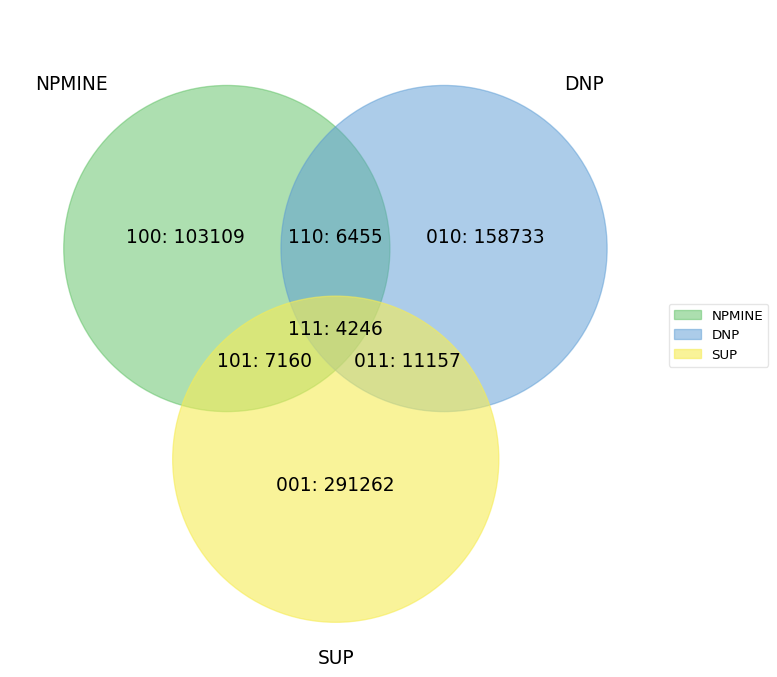

In [14]:
labels = venn.get_labels([comp['standardInChIKey'], dnp['standardInChIKey'], sup['standardInChIKey']], fill=['number', 'logic'])
fig, ax = venn.venn3(labels, names=['NPMINE', 'DNP', 'SUP'])
fig.show()

/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


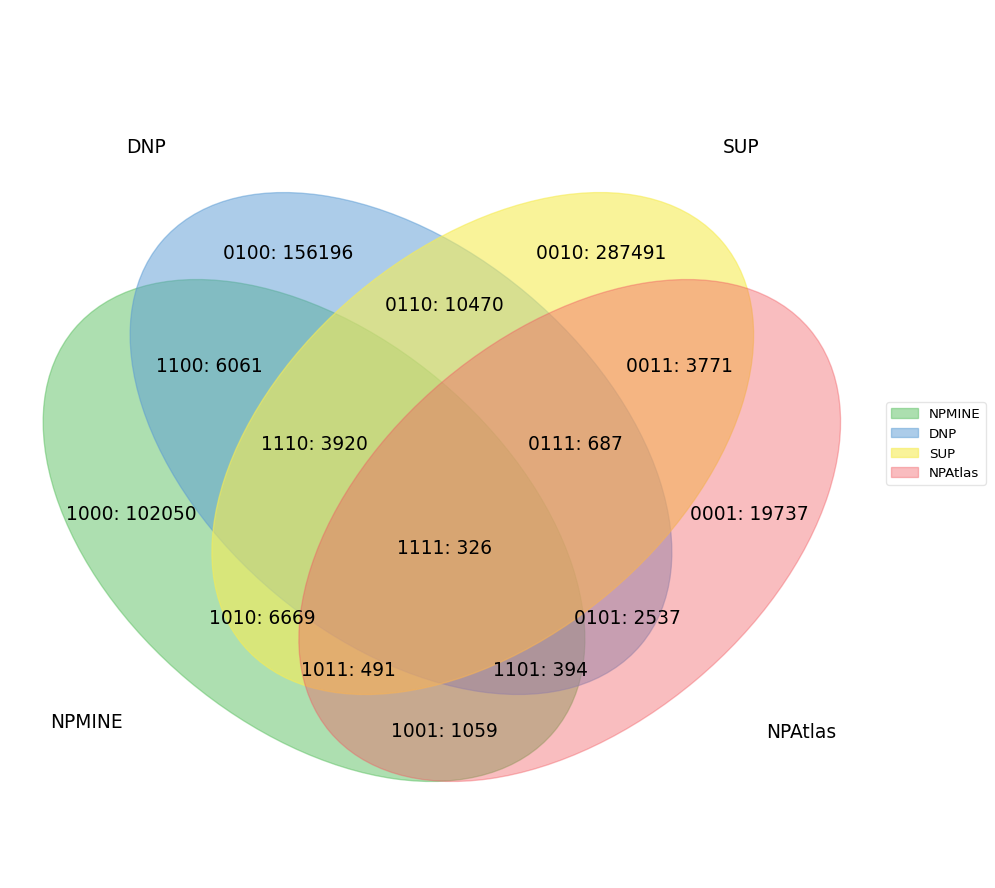

In [15]:
labels = venn.get_labels([comp['standardInChIKey'], dnp['standardInChIKey'], 
                          sup['standardInChIKey'], npatlas['compound_inchikey']], 
                         fill=['number', 'logic'])
fig, ax = venn.venn4(labels, names=['NPMINE', 'DNP', 'SUP', 'NPAtlas'])
fig.show()

/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


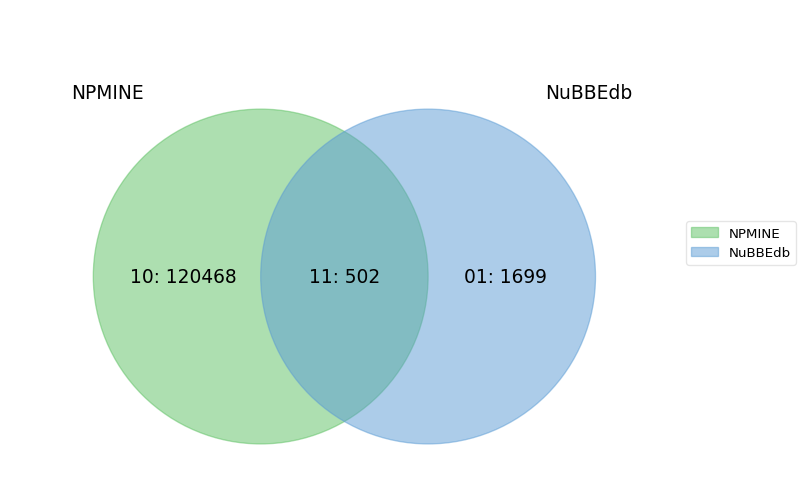

In [31]:
labels = venn.get_labels([comp['standardInChIKey'], nubbe], fill=['number', 'logic'])
fig, ax = venn.venn2(labels, names=['NPMINE', 'NuBBEdb'])
fig.show()

In [32]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt


with PdfPages('npmine_vs_others.pdf') as pdf:
    #plt.figure(figsize=(3, 3))
    labels = venn.get_labels([comp['standardInChIKey'], dnp['standardInChIKey'], 
                          sup['standardInChIKey'], npatlas['compound_inchikey']], 
                         fill=['number', 'logic'])
    fig, ax = venn.venn4(labels, names=['NPMINE', 'DNP', 'SUP', 'NPAtlas'])
    pdf.savefig()
    plt.close()
    labels = venn.get_labels([comp['standardInChIKey'], nubbe], fill=['number', 'logic'])
    fig, ax = venn.venn2(labels, names=['NPMINE', 'NuBBEdb'])
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()